In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import seaborn as sns
# import dask.dataframe as dd
from sklearn import preprocessing

from google.colab import drive
drive.mount("/content/drive")

ValueError: mount failed

In [ ]:

#1
%load_ext cudf.pandas



In [ ]:
train1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/InsuranceCross/train.csv')
test1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/InsuranceCross/test.csv')
# train=dd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/InsuranceCross/train1.csv')
# test=dd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/InsuranceCross/test1.csv')

train1.head(5)

In [ ]:
# @title conversion
import numbers
import pandas as pd
from typing import Optional

def auto_d(df_: pd.DataFrame, inplace=False) -> Optional[pd.DataFrame]:

    df = df_ if inplace else df_.copy()

    for col in df.columns:
        # integers
        if issubclass(df[col].dtypes.type, numbers.Integral):
            # unsigned integers
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            # signed integers
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')
        # other real numbers
        elif issubclass(df[col].dtypes.type, numbers.Real):
            df[col] = pd.to_numeric(df[col], downcast='float')

    if not inplace:
        return df
train1=auto_d(train1)

In [ ]:
def change(df):
    value_counts_mapping = df['Annual_Premium'].value_counts().to_dict()
    annual_premium_counts = df['Annual_Premium'].map(value_counts_mapping).astype('int32')
    df['Annual_Premium'] = df['Annual_Premium'].where(annual_premium_counts >= 50, -1).astype('int32')
    df['Annual_Premium_weights'] = annual_premium_counts
    value_counts_mapping = df['Vintage'].value_counts().to_dict()
    vintage_counts = df['Vintage'].map(value_counts_mapping).astype('int32')
    df['Vintage'] = df['Vintage'].where(vintage_counts >= 50, -1).astype('int32')
    df['Vintage_weights'] = vintage_counts
    df['Annual_Premium_Insurance'] = df['Previously_Insured'].astype(str) + df['Annual_Premium'].astype(str)
    df['Annual_Premium_Insurance'] = pd.factorize(df['Annual_Premium_Insurance'])[0] + 1
    df['Vehicle_Age_Insurance'] = df['Previously_Insured'].astype(str) + df['Vehicle_Age'].astype(str)
    df['Vehicle_Age_Insurance'] = pd.factorize(df['Vehicle_Age_Insurance'])[0] + 1
change(train1)
train1.head(5)

In [ ]:


def down_sampling(X, y, i):
    majority_class = X[y == 0].copy()
    minority_class = X[y == 1]
    sample_size = len(minority_class)
    majority_sample, X_rest, y_sample, y_rest = train_test_split(majority_class, y[y == 0],
                                                                  train_size=sample_size, random_state=i,
                                                stratify=majority_class['Age'])
    X_minimal = pd.concat([majority_sample, minority_class], axis=0)
    y_minimal = pd.concat([y_sample, y[y == 1]])


    return X_minimal, y_minimal, X_rest, y_rest



X_minimal, y_minimal, X_rest, y_rest = down_sampling(x1,y1, 63)
X_t, _, y_t, _ = train_test_split(X_rest, y_rest, train_size=8.5*1000000,
                                  random_state=31)
X_t = pd.concat([X_minimal, X_t], axis=0)
y_t = pd.concat([y_minimal, y_t], axis=0)


In [ ]:
Polars lazyframe, PySpark, DataTable and CuDF
parquet files

In [ ]:
set max_bin ,n estimators high value

In [ ]:
#2
from sklearn.metrics import roc_auc_score
def probabilities(train,test):
  probabilities = {}
  for col in train.columns.drop('Response'):
      prob = train.groupby(col)['Response'].mean()
      probabilities[col] = prob
      train[col] = train[col].map(probabilities[col])

  for col in test.columns:
      test[col] = test[col].map(probabilities[col])

  ground_truth = train["Response"].copy()
  train.drop(columns = ["Response"], inplace=True)
  train["Prediction"] = train.sum(axis = 1)
  train["Response"] = ground_truth

  print(roc_auc_score(train["Response"], train["Prediction"]))
  test["Response"] = test.sum(axis=1)


In [ ]:
# @title exp
# df1=train1[train1['Response']==0]
# df2=train1[train1['Response']==1]
# crain1=pd.concat([df1[:len(df2)], df2])

#   test1= dd.from_pandas(test1, npartitions=4)
# train1.skew().sort_values(ascending=False)

In [ ]:
# @title split
# train_duplicates_number = train[train.duplicated()]
train1 = train1.drop_duplicates()

def split(Data,Target,id):
  y=Data[Target].copy()
  x=Data.drop([Target,id],axis=1).copy()
  y=y.astype(int)


  return x,y
# x,y=split(train,'Response','id')
x1,y1=split(train1,'Response','id')


In [ ]:
# @title label encoder
def encoder(data):
  for col in data.columns:
      if data.dtypes[col] == "object":
          le = preprocessing.LabelEncoder()
          le.fit(data[col])
          data[col] = le.transform(data[col])
  return data
# x=encoder(x)
x1=encoder(x1)
# u=encoder(train1)
test1=encoder(test1)

In [ ]:
# @title info

def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  desc['unique']=df.nunique()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  desc = pd.concat([desc,df.describe(include = 'all').T],axis=1)
  display(desc)
describe(train1)

NameError: name 'train1' is not defined

##plot

---

In [ ]:
# @title cat & cont fea
def cat_fea(train):


  unique_counts = train.nunique()
  #Threshold to distinguish continous and categorical
  threshold = 12
  continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
  categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
  return continuous_vars,categorical_vars


cont,cat=cat_fea(x1)

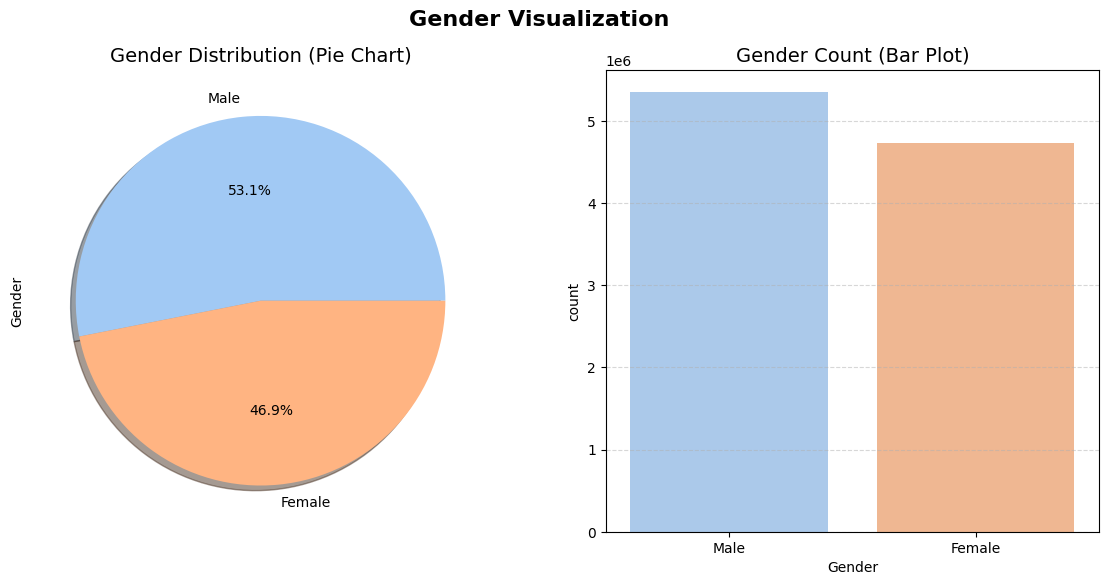

Columns in Target column are: Gender
Male      5358136
Female    4731603
Name: count, dtype: int64


In [ ]:
# @title category feature disturbutions
import warnings
warnings.filterwarnings("ignore")
def target_plot(column,train):
    custom_palette = sns.color_palette("pastel")
    f, ax = plt.subplots(1, 2, figsize=(14,6))
    train[column].value_counts().plot.pie(autopct='%2.1f%%', ax=ax[0], shadow=True, colors=custom_palette)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14)
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14)
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Columns in Target column are:",train[column].value_counts())
for i in cat:
 target_plot(i,df1)

for i in cat :
  target_plot(i,df2)

In [ ]:
# @title continous feature disturbutions
def target3_plot(column,train):
      import warnings
      warnings.filterwarnings("ignore")
      hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
      fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, hue_order=hue_columns, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')
      # axes[0].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, shade=True,hue_order=hue_columns, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')
      # axes[1].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()
for i in cont:
 target3_plot(i,df1)

for i in cont :
  target3_plot(i,df2)


In [ ]:
# @title continous feature disturbutions
def target3_plot(column,train):
      import warnings
      warnings.filterwarnings("ignore")
      hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
      fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, hue_order=hue_columns, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')
      # axes[0].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, shade=True,hue_order=hue_columns, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')
      # axes[1].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()

for i in cont:
   target3_plot(i,test1)


In [ ]:
  # @title correlatin graph
def cor_plot(x,m,target_column):
    correlation_matrix = x.corr()
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Correlation Matrix')
    plt.show()

    highly_correlated = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >= 0.7:
                highly_correlated.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

    less_correlated = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) <= 0.3:
                less_correlated.append((correlation_matrix.index[i], correlation_matrix.columns[j]))


    correlation_with_target = m.corr()[target_column].sort_values(ascending=False)
    print("Correlation with Target:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(correlation_with_target)



    plt.figure(figsize=(10, 8))
    correlation_with_target.plot(kind='bar', color='skyblue')
    plt.title('Correlation with Target Variable')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

cor_plot( x1,u,'Response')



In [ ]:
# @title finding outlier
!pip install Autoviz

import autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
dftc = AV.AutoViz(x)

In [ ]:
# @title LDA
y_train=ytr
y_test=yte
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
sc = StandardScaler()
X_train = sc.fit_transform(xtr)
X_test = sc.transform(xte)
lda = LDA()
X_train = lda.fit_transform(X_train, ytr)
X_test = lda.transform(X_test)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

In [ ]:
# @title tree plot
from sklearn import tree
import re
import matplotlib

fig, ax = plt.plot(figsize=(8,5))
clf=tree.DecisionTreeClassifier()
clf.fit(xtr,ytr)
tree.plot_tree(clf,ax=ax,
feature_names=x.columns, class_name=True)

def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
      txt = obj.get_text()
      _lines = txt.splitlines()
      _result = []
      value_index = None
      class_index = None
      for i, _line in enumerate(_lines):
        if "value" in _line:
          value_index = i
        if "class" in _line:
          class_index = i
      assert value_index and class_index
      _result = _lines[:value_index] + _lines[class_index:]
      obj.set_text("\n".join(_result))
    return obj

ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
fig.show()

AttributeError: module 'matplotlib' has no attribute 'plot'

In [ ]:
def drop_duplicates_with_sample_weights(df, sample_weights, subset):
    df2 = pd.concat([df, sample_weights], axis=1)
    df = df.join(df2.groupby(subset)[sample_weights.name].sum(),
                on=subset).drop_duplicates(subset=subset)
    sample_weights = df.pop(sample_weights.name)
    return df, sample_weights

rs = 0
X = train.sample(frac=1, axis=0, random_state=rs)
sample_weights = pd.Series([1/len(X)]*len(X), index=X.index, name='sample_weights')
for i in range(10):
    cols = list(train.columns); cols.pop(i)
    X, sample_weights = drop_duplicates_with_sample_weights(X, sample_weights, subset=cols)
    print(len(X))
print(np.average(X['Response'], weights=sample_weights))

##model

---

In [ ]:
# @title tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
333
\
prit(lh)
xtr,xte,ytr,yte=train_test_split(x1,y1,test_size=0.2,shuffle=True,stratify=y1)

from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(xtr,ytr)
tree.plot_tree(clf,
feature_names=x1.columns, class_name=True)
clf.score(xte,yte)

TypeError: plot_tree() got an unexpected keyword argument 'class_name'

In [ ]:
# @title gaussian
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

model.fit(xtr,ytr)
model.score(xte1,yte1)

In [ ]:
!pip install xgboost
!pip install optuna

In [ ]:
from sklearn.model_selection import train_test_split

# xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y )
xtr,xte,ytr,yte=train_test_split(x1,y1,test_size=0.2,shuffle=True,stratify=y1 )


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import optuna
import cupy

In [ ]:
# @title xgboost

def create(trial):
  params = {
          "min_child_weight":trial.suggest_int('min_child_weight',1,5),
          "max_depth": trial.suggest_int("max_depth", 5, 10),
          "gamma":trial.suggest_float('gamma',0,0.5),
          "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
          "subsample": trial.suggest_float("subsample", 0.5, 1.0),
          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
          #"reg_alpha":trial.suggest_float('reg_alpha',0 ,5),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
          "max_bin" :trial.suggest_int('max_bin',500,8000),
          "scale_pos_weight":trial.suggest_float('scale_pos_weight',7.0,16.0,),

      }
  return params

model=XGBClassifier(
#      learning_rate =0.1, max_depth=4,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0,
 objective= 'binary:logistic',tree_method="hist",eval_metric="auc",
    device="cuda")
def objective(trial):


    params=create(trial)
    model.set_params(**params)
    model.fit(cupy.array(xtr), ytr)
    predictions = model.predict(cupy.array(xte))
    acc = accuracy_score(yte, predictions, normalize=True)
    # rmse = -mean_squared_error(yte, predictions)

   # cross = cross_val_score(model,cupy.array(x1),y1,cv=3, n_jobs=-1).mean()
    return acc

optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

#print('Best hyperparameters:', study.best_params)
#print('Best RMSE:', study.best_value)
best_params=study.best_params
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-07-20 15:55:28,262] A new study created in memory with name: no-name-0d3bd82b-3786-40f5-8d9e-b534bb5474c4
[I 2024-07-20 15:56:19,930] Trial 0 finished with value: 0.6508109658577289 and parameters: {'min_child_weight': 5, 'max_depth': 10, 'gamma': 0.47810090245152664, 'learning_rate': 0.0139831953824842, 'subsample': 0.9915185910588664, 'colsample_bytree': 0.6617769443933239, 'lambda': 0.00017058000160051219, 'alpha': 1.0443688935702213e-06, 'max_bin': 3550, 'scale_pos_weight': 13.782871748826665}. Best is trial 0 with value: 0.6508109658577289.
[I 2024-07-20 15:56:56,930] Trial 1 finished with value: 0.664956800639733 and parameters: {'min_child_weight': 4, 'max_depth': 7, 'gamma': 0.30147808547133226, 'learning_rate': 0.021486334091177964, 'subsample': 0.9995247766134803, 'colsample_bytree': 0.6983514131019706, 'lambda': 0.0001905977001322818, 'alpha': 2.7273167397692576e-08, 'max_bin': 2235, 'scale_pos_weight': 10.944469844849397}. Best is trial 1 with value: 0.6649568006397

Number of finished trials: 25
Best trial:
  Value: 0.7178056115708226
  Params: 
    min_child_weight: 2
    max_depth: 9
    gamma: 0.12377986541880058
    learning_rate: 0.06671853628820011
    subsample: 0.6727956515685313
    colsample_bytree: 0.9007243501173452
    lambda: 0.7725449190897584
    alpha: 0.029865865351965698
    max_bin: 5985
    scale_pos_weight: 7.090078371005698


In [ ]:
# @title xgb model
best_params=study.best_params
model=XGBClassifier(
 **best_params,objective= 'binary:logistic',tree_method="hist",eval_metric="auc",
    device="cuda")
model.fit(cupy.array(xtr),ytr)
model.score(cupy.array(xte),yte)

0.7178056115708226

In [ ]:
import gc
gc.collect()

181

In [ ]:
!pip install optuna-integration

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install catboost


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from optuna.integration import CatBoostPruningCallback
import sklearn.metrics as metrics

In [ ]:
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for CatBoostClassifier
    param = {
        # "objective": "MultiClass",
        # "eval_metric": "MultiClass",
        # "random_state": 42,
        "iterations":10,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        # "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
        "scale_pos_weight":trial.suggest_float('scale_pos_weight',7.0,16.0,),
        "bagging_temperature":trial.suggest_float('bagging_temperature',0.0,1.0,),
        "random_strength":trial.suggest_float('random_strength',1,20),
        "custom_metric" : "AUC",
    }

    # Create an instance of CatBoostClassifier with the suggested parameters
    catboost_classifier = CatBoostClassifier(**param,
                                             bootstrap_type='Poisson',
                                             task_type='GPU'
                                             )
    # pruning_callback = CatBoostPruningCallback(trial,metric="AUC")
    # Fit the classifier on the training data
    catboost_classifier.fit(X_train, y_train,cat,
                              eval_set=[(X_test,y_test)],
        # verbose=0,
        early_stopping_rounds=100,
        # callbacks=[pruning_callback],
                            )
    # pruning_callback.check_pruned()
    # Predict on the test data
    y_pred = catboost_classifier.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize",
                            sampler =sampler,
                            pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
                            )

# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=10)

# Get the best parameters after optimization
best_params = study.best_params

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-07-13 08:57:54,150] A new study created in memory with name: no-name-8ae86ee3-2971-4ab8-891c-6b1d69ef9a04
<ipython-input-14-156e8274bc5a>:26: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial,metric="AUC")


0:	learn: 0.6745957	test: 0.6745860	best: 0.6745860 (0)	total: 3.96s	remaining: 6m 32s
1:	learn: 0.6578946	test: 0.6578809	best: 0.6578809 (1)	total: 8.72s	remaining: 7m 7s
2:	learn: 0.6424771	test: 0.6424607	best: 0.6424607 (2)	total: 13.2s	remaining: 7m 5s
3:	learn: 0.6281628	test: 0.6281427	best: 0.6281427 (3)	total: 18.1s	remaining: 7m 14s
4:	learn: 0.6149018	test: 0.6148796	best: 0.6148796 (4)	total: 23.3s	remaining: 7m 23s
5:	learn: 0.6028134	test: 0.6027870	best: 0.6027870 (5)	total: 26.8s	remaining: 6m 59s
6:	learn: 0.5918105	test: 0.5917799	best: 0.5917799 (6)	total: 30.1s	remaining: 6m 39s
7:	learn: 0.5816259	test: 0.5815924	best: 0.5815924 (7)	total: 33.1s	remaining: 6m 20s
8:	learn: 0.5716089	test: 0.5715715	best: 0.5715715 (8)	total: 40.6s	remaining: 6m 50s
9:	learn: 0.5628804	test: 0.5628416	best: 0.5628416 (9)	total: 45.1s	remaining: 6m 46s
10:	learn: 0.5543588	test: 0.5543218	best: 0.5543218 (10)	total: 52.9s	remaining: 7m 8s
11:	learn: 0.5470647	test: 0.5470272	best: 0

[I 2024-07-13 09:04:47,936] Trial 0 finished with value: 0.6969586607329115 and parameters: {'learning_rate': 0.04370861069626263, 'max_depth': 10, 'subsample': 0.7453942447208348, 'colsample_bylevel': 0.6187255599871848, 'min_data_in_leaf': 16, 'reg_lambda': 0.15599452033620265, 'scale_pos_weight': 7.522752509513795, 'bagging_temperature': 0.8661761457749352, 'random_strength': 12.421185223120967}. Best is trial 0 with value: 0.6969586607329115.
<ipython-input-14-156e8274bc5a>:26: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial,metric="AUC")


0:	learn: 0.6633929	test: 0.6633810	best: 0.6633810 (0)	total: 3.12s	remaining: 5m 9s
1:	learn: 0.6377023	test: 0.6376824	best: 0.6376824 (1)	total: 5.61s	remaining: 4m 34s
2:	learn: 0.6155245	test: 0.6155150	best: 0.6155150 (2)	total: 8.82s	remaining: 4m 45s
3:	learn: 0.5948555	test: 0.5948496	best: 0.5948496 (3)	total: 12.1s	remaining: 4m 50s
4:	learn: 0.5768939	test: 0.5768841	best: 0.5768841 (4)	total: 14.4s	remaining: 4m 33s
5:	learn: 0.5619882	test: 0.5619903	best: 0.5619903 (5)	total: 16.6s	remaining: 4m 19s
6:	learn: 0.5485230	test: 0.5485217	best: 0.5485217 (6)	total: 18.8s	remaining: 4m 10s
7:	learn: 0.5372730	test: 0.5372746	best: 0.5372746 (7)	total: 21s	remaining: 4m 1s


[W 2024-07-13 09:05:46,227] Trial 1 failed with parameters: {'learning_rate': 0.0737265320016441, 'max_depth': 3, 'subsample': 0.9714143595538947, 'colsample_bylevel': 0.8408205087604007, 'min_data_in_leaf': 22, 'reg_lambda': 0.18182496720710062, 'scale_pos_weight': 8.650640588680904, 'bagging_temperature': 0.3042422429595377, 'random_strength': 10.97037220101252} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-14-156e8274bc5a>", line 55, in <lambda>
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=10)
  File "<ipython-input-14-156e8274bc5a>", line 28, in objective
    catboost_classifier.fit(X_train, y_train,cat,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, 

KeyboardInterrupt: 

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(**best_params,
                          iterations=100,
                           bootstrap_type='Poisson',
                           task_type='GPU',
                           )
model.fit(xtr,ytr,cat)
model.score(xte,yte)

In [ ]:
model = CatBoostClassifier(iterations=500,
                           bootstrap_type='Poisson',
                           max_depth = 7,
                           min_data_in_leaf=53,
                          scale_pos_weight= 6.052506617589703,
                           bagging_temperature=0.4952177656897848,
                           random_strength= 7.098954840780049,
                            subsample=0.2304925388221032,
                           reg_lambda =  0.8448925624295072,
                           learning_rate=0.028310918728285818,
                           task_type='GPU',
                           )
model.fit(xtr,ytr,cat)
model.score(xte,yte)

0:	learn: 0.6649530	total: 460ms	remaining: 3m 49s
1:	learn: 0.6398325	total: 910ms	remaining: 3m 46s
2:	learn: 0.6175895	total: 1.34s	remaining: 3m 42s
3:	learn: 0.5972214	total: 1.8s	remaining: 3m 43s
4:	learn: 0.5798040	total: 2.23s	remaining: 3m 40s
5:	learn: 0.5649299	total: 2.53s	remaining: 3m 28s
6:	learn: 0.5514100	total: 2.98s	remaining: 3m 29s
7:	learn: 0.5393928	total: 3.42s	remaining: 3m 30s
8:	learn: 0.5288723	total: 3.85s	remaining: 3m 30s
9:	learn: 0.5190374	total: 4.29s	remaining: 3m 30s
10:	learn: 0.5109586	total: 4.6s	remaining: 3m 24s
11:	learn: 0.5034946	total: 5.04s	remaining: 3m 25s
12:	learn: 0.4966367	total: 5.5s	remaining: 3m 25s
13:	learn: 0.4907374	total: 5.89s	remaining: 3m 24s
14:	learn: 0.4855653	total: 6.34s	remaining: 3m 24s
15:	learn: 0.4805734	total: 6.8s	remaining: 3m 25s
16:	learn: 0.4761556	total: 7.25s	remaining: 3m 25s
17:	learn: 0.4723851	total: 7.7s	remaining: 3m 26s
18:	learn: 0.4687158	total: 8.11s	remaining: 3m 25s
19:	learn: 0.4654337	total:

0.7265745601835756

In [ ]:
del u

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
test1['id'].sum()

117653677411113

In [ ]:

# X_test = lda.transform(test1.drop('id',axis=1))
# l= classifier.predict(X_test)

l=model.predict(test1.drop('id',axis=1))
df=pd.DataFrame()
df['Response']=l
df['id']=test1['id']
df.to_csv("/content/drive/MyDrive/Colab Notebooks/projects/InsuranceCross/sample_submission.csv", index=False)


In [ ]:
optuna.visualization.plot_contour(study)